# Inspect the creation of synthetic data

Here, we we will use the module `my28brains/datasets/synthetic.py` to:
- generate synthetic meshes of spheres and ellipsoids,
- generate synnthetic mesh geodesics both parameterized and unparameterized.

This will ensure that this module works correctly and that we can use it to test our geodesic regressions schemes.

Note: if an error arises with pykeops, make sure that the "compiled shared objects" (.so files on Unix, .dylib on macOS) are stored in the folder ~/.cache/keops/, where ~ is the path to your home folder. If there are not there, then from your terminal:

```
conda activate my28brains
python
```

and in the python shell:
```
import pykeops
```

This should build the necessary files.

In [1]:
import setcwd

setcwd.main()

Working directory:  /home/nmiolane/code/my28brains/my28brains
Directory added to path:  /home/nmiolane/code/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/H2_SurfaceMatch


In [2]:
import os
import trimesh

In [94]:
import my28brains.datasets.synthetic as synthetic
import my28brains.viz as viz

# Inspect generation of synthetic meshes: spheres, ellipsoids, pills

In [4]:
mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (642, 3).


TrackedArray([[-14194.74002722,  22967.57182551,      0.        ],
              [ 14194.74002722,  22967.57182551,      0.        ],
              [-14194.74002722, -22967.57182551,      0.        ],
              ...,
              [-24650.52730917, -10789.39039595,   2222.73666086],
              [-26092.60012987,  -3585.39687435,   5943.15974178],
              [-26024.25411363,  -7192.92693063,      0.        ]])

Array of faces has shape: (1280, 3).


TrackedArray([[  0, 532, 196],
              [532, 137, 534],
              [196, 534,  53],
              ...,
              [443,  98, 453],
              [455, 453, 118],
              [443, 453, 455]])

In [5]:
mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[10, 2, 2]
)
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (642, 3).


TrackedArray([[-141947.40027217,   45935.14365101,       0.        ],
              [ 141947.40027217,   45935.14365101,       0.        ],
              [-141947.40027217,  -45935.14365101,       0.        ],
              ...,
              [-246505.27309172,  -21578.7807919 ,    4445.47332173],
              [-260926.00129866,   -7170.79374871,   11886.31948356],
              [-260242.54113626,  -14385.85386127,       0.        ]])

Array of faces has shape: (1280, 3).


TrackedArray([[  0, 532, 196],
              [532, 137, 534],
              [196, 534,  53],
              ...,
              [443,  98, 453],
              [455, 453, 118],
              [443, 453, 455]])

In [6]:
mesh = synthetic.generate_mesh(mesh_type="pill")
print(f"Array of vertices has shape: {mesh.vertices.shape}.")
display(mesh.vertices)
print(f"Array of faces has shape: {mesh.faces.shape}.")
display(mesh.faces)
mesh.show()

Array of vertices has shape: (1922, 3).


TrackedArray([[ 6.12323400e-17,  0.00000000e+00, -1.50000000e+00],
              [ 1.01168322e-01,  0.00000000e+00, -1.49486932e+00],
              [ 2.01298520e-01,  0.00000000e+00, -1.47952994e+00],
              ...,
              [ 2.97921608e-01, -2.93427172e-02,  1.45413926e+00],
              [ 2.00329213e-01, -1.97307053e-02,  1.47952994e+00],
              [ 1.00681169e-01, -9.91622961e-03,  1.49486932e+00]])

Array of faces has shape: (3840, 3).


TrackedArray([[   1,    0,   32],
              [   1,   32,    2],
              [   2,   32,   33],
              ...,
              [1920,   29, 1921],
              [1921,   29,   30],
              [1921,   30,   31]])

# Inspect generation of geodesics

This computation takes several minutes.

## Parameterized

In [25]:
start_mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
end_mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[5, 2, 2]
)

parameterized_geod, parameterized_faces, _, _, _ = synthetic.generate_parameterized_geodesic(
    start_mesh=start_mesh, end_mesh=end_mesh, n_times=5, n_steps=3
)

Geodesic function created. Computing points along geodesic...


Done.


In [30]:
geod = parameterized_geod
faces = parameterized_faces
print(geod.shape)
print(faces.shape)

mesh1 = trimesh.Trimesh(vertices=geod[0], faces=faces)
mesh2 = trimesh.Trimesh(vertices=geod[1], faces=faces)
mesh3 = trimesh.Trimesh(vertices=geod[2], faces=faces)
mesh4 = trimesh.Trimesh(vertices=geod[3], faces=faces)
mesh5 = trimesh.Trimesh(vertices=geod[4], faces=faces)

torch.Size([5, 642, 3])
(1280, 3)


In [96]:
mesh5.show()

ntimes = 5
tensor([     0., 222750., 445500., 668250., 891000.])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])
torch.Size([642, 3])


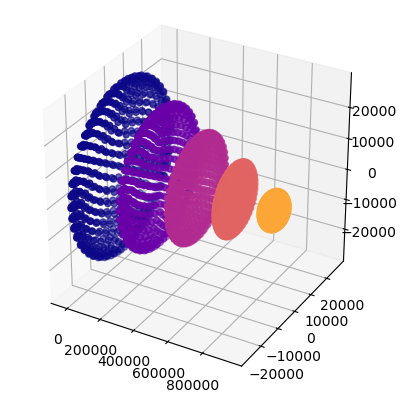

In [98]:
mesh_sequence_vertices = viz.offset_mesh_sequence(parameterized_geod)
viz.plot_mesh_sequence(mesh_sequence_vertices)

In [99]:
viz.plotly_mesh_sequence(mesh_sequence_vertices)

## Unparameterized

FIXME: This code does not create a geodesic: all the points along the geodesics are spheres.

In [17]:
start_mesh = synthetic.generate_mesh(mesh_type="sphere", n_subdivisions=3)
end_mesh = synthetic.generate_mesh(
    mesh_type="ellipsoid", n_subdivisions=3, ellipsoid_dims=[5, 2, 2]
)

unparameterized_geod, unparameterized_faces = synthetic.generate_unparameterized_geodesic(
    start_mesh=start_mesh, end_mesh=end_mesh, gpu_id=1
)

before starting: Vertices then Faces for S then T
(642, 3) (1280, 3)
(642, 3) (1280, 3)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3852     M =           10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 3852      1      3      1     0     0   5.452D+11   4.776D+19

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 ############ Iteration 0:
F0.shape (1280, 3)
geod.shape: (2, 642, 3)


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         3852     M =           10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

 ############ Iteration 1:
F0.shape (1280, 3)
geod.shape: (2, 642, 3)
in timesteps:
 3852      9     13      1     0     0   6.568D+16   4.776D+23

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1926     M =           10


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
geod.shape: (3, 642, 3)
 1926      9     11      1     0     0   7.920D+11   2.694D+18

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5778     M =           10


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

 ############ Iteration 2:
F0.shape (1280, 3)
geod.shape: (3, 642, 3)
in timesteps:
 5778      2      4      1     0     0   2.735D+22   4.776D+28

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         5778     M =           10


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 5778      5      7      1     0     0   3.939D+11   2.245D+18

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
geod.shape: (5, 642, 3)
3 (1280, 3)


In [100]:
geod = unparameterized_geod
faces = unparameterized_faces

print(geod.shape)
print(faces.shape)

mesh1 = trimesh.Trimesh(vertices=geod[0], faces=faces)
mesh2 = trimesh.Trimesh(vertices=geod[1], faces=faces)
mesh3 = trimesh.Trimesh(vertices=geod[2], faces=faces)
mesh4 = trimesh.Trimesh(vertices=geod[3], faces=faces)
mesh5 = trimesh.Trimesh(vertices=geod[4], faces=faces)

(5, 642, 3)
(1280, 3)


In [101]:
mesh1.show()

ntimes = 5
[     0.         101249.99983011 202499.99966023 303749.99949034
 404999.99932045]
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)
(642, 3)


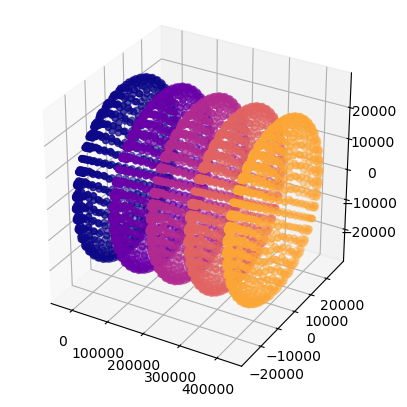

In [105]:
import importlib
importlib.reload(viz)

mesh_sequence_vertices = viz.offset_mesh_sequence(unparameterized_geod)

viz.plot_mesh_sequence(mesh_sequence_vertices)

In [106]:
viz.plotly_mesh_sequence(mesh_sequence_vertices)